# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2025

**Rotación de Personal - IBM**

#### **Nombre y matrícula:**
#### Liliana Irais Beltrán Martínez A01797565

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance".**

**El archivo consiste de 1470 registros:**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [48]:
# Importa aquí todas las librerías que consideres necesarias:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


#### La rotación de personal se refiere al flujo de empleados que entran y salen de una empresa durante un período determinado, siendo un proceso que abarca la terminación de un contrato y la contratación de nuevos integrantes.

#### También suele entenderse como un indicador que mide la tasa de empleados que abandonan la empresa por razones voluntarias (renuncias, jubilaciones) o involuntarias (despidos) y son reemplazados por nuevos integrantes. Si bien una cierta rotación es normal, una tasa elevada puede indicar problemas de cultura laboral, liderazgo o desarrollo profesional.

#### Se calcula dividiendo el número de empleados que abandonaron la empresa en un período determinado entre el número promedio de empleados en ese mismo período, y luego multiplicando el resultado por 100 para obtener un porcentaje


++++++++ Termina la sección de agregar texto. +++++++++++

#### **Descarga el archivo de datos de la página de Kaggle y lo cargamos como un DataFrame de Pandas. Utilizaremos el método “describe” con el argumento include= “all”.**

In [49]:
path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(path)

df = pd.DataFrame(data)

print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 2:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" de Pandas.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


#### La función "describe" genera métricas estadísticas útiles que están destinadas a resumir los datos de cada columna. Estas métricas incluyen: Recuento, Media, Desviación Estándar (desviación estándar), Mínimo (mín.), Primer cuartil (25%), Segundo cuartil (50%) o mediana, Tercer cuartil (75%) y Máximo (máx.).
#### Sin el argumento "all" muestra únicamente las variables numéricas, pero si agregamos el argumento "all" incluye estadísticas para todas las colimnas, tanto numéricas como categóricas.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 3:**

#### **Con base a la información desplegada por la instrucción anterior, se ha decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Todos los registros de la base tienen el mismo valor ("Y"), por lo tanto no es una variable que enriquezca el modelo

**b)	EmployeeCount**: Todos los registros tienen valor = 1, por lo que tampoco contribuitrán al modelo.

**c)	StandardHours**: Todos los registros tienen valor = 80.0, por lo que tampoco contribuitrán al modelo

**d)	EmployeeNumber**: Se trata de un identificador o index, por lo que dejarlo podría "contaminar" el modelo, es decir, causar problemas para su interpretación.

++++++++ Termina la sección de agregar texto. +++++++++++




Una vez eliminadas las variables anteriores y de acuerdo a la documentación del problema, tenemos la siguiente información.

En las variables categóricas el entero dentro de los paréntesis indica el total de niveles de dicha variable.

In [50]:
# Se eliminan los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


**i. variables numéricas (14):**

NumCompaniesWorked,

TrainingTimesLastYear,

Age,

DailyRate,

DistanceFromHome,

HourlyRate,

MonthlyIncome,

MonthlyRate,

PercentSalaryHike,

TotalWorkingYears,

YearsAtCompany,

YearsInCurrentRole,

YearsSinceLastPromotion,

YearsWithCurrManager

**ii. Variables ordinales (9):**

Education (5),

EnvironmentSatisfaction (4),

JobInvolvement (4),

JobLevel (5),

JobSatisfaction (4),

PerformanceRating (2),

RelationshipSatisfaction (4),

StockOptionLevel (4),

WorkLifeBalance (4)

**iii. Variables binarias (3):**

Attrition (variable de salida),

Gender,

OverTime

**iv. Variables nominales (5):**

BusinessTravel (3),

Department (3),

EducationField (6),

JobRole (9),

MaritalStatus (3)

# **Ejercicio 4:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, con el porcentaje de cada uno que consideres más adecuado y tomando en cuenta los siguientes puntos:**

* **Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente.**

* **Realiza dicha partición conservando la estratificación de las clases de la variable de salida “Attrition”.**

* **Utilizar la semilla "random_state=17" en cada función de partición para permitir la repetibilidad de tu modelo.**

* **Finalmente despliega la dimensión de cada uno de estos tres conjuntos, así como el porcentaje de datos que hay en cada uno de ellos.**



In [51]:
print("Dimensiones y Porcentajes de la partición Train, Val, Test generada:")
print("-"*70)

# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

x = df.drop('Attrition', axis=1)
y = df[['Attrition']]

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y, random_state=17)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, stratify=ytrain, random_state=17) # 0.25 * 0.8 = 0.2

print("Dimensiones de Xtrain, ytrain:", Xtrain.shape, ytrain.shape)
print("Dimensiones de Xval, yval:", Xval.shape, yval.shape)
print("Dimensiones de Xtest, ytest:", Xtest.shape, ytest.shape)

print("\nPorcentaje de datos en cada partición:")
print("Train:", Xtrain.shape[0] / df.shape[0])
print("Validation:", Xval.shape[0] / df.shape[0])
print("Test:", Xtest.shape[0] / df.shape[0])


# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimensiones y Porcentajes de la partición Train, Val, Test generada:
----------------------------------------------------------------------
Dimensiones de Xtrain, ytrain: (882, 30) (882, 1)
Dimensiones de Xval, yval: (294, 30) (294, 1)
Dimensiones de Xtest, ytest: (294, 30) (294, 1)

Porcentaje de datos en cada partición:
Train: 0.6
Validation: 0.2
Test: 0.2


# **Ejercicio 5:**


**a) Aplica la transformación LabelEncoder() de Sklearn a la variable“Attrition”, tomando en cuenta los siguientes puntos:**

* **Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT.**

* **Al aplicar la transformación LabelEncoder, deberás evitar el filtrado de información (data-leakage).**


In [52]:
# a)
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


encoder = LabelEncoder()
ytrainT = encoder.fit_transform(ytrain.values.ravel())
yvalT = encoder.transform(yval.values.ravel())
ytestT = encoder.transform(ytest.values.ravel())

print("Clases encontradas:", encoder.classes_)
print("Train:", np.unique(ytrainT, return_counts=True))



# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('Porcentaje de datos en cada clase del conjunto de entrenamiento :\n', pd.Series(ytrainT).value_counts() / ytrainT.shape[0])

Clases encontradas: ['No' 'Yes']
Train: (array([0, 1]), array([740, 142]))
Porcentaje de datos en cada clase del conjunto de entrenamiento :
 0    0.839002
1    0.160998
Name: count, dtype: float64



#### **Además, responde las siguientes preguntas:**

**b) Con base a la documentación de Sklearn, ¿a qué tipo de variables se debe aplicar la transformación LabelEncoder()?**

**c) Encuentra la proporción de datos de cada clase de la variable "ytrainT" y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

**d) ¿Cuál es el umbral del modelo base a superar para evitar modelos subentrenados?**

**e) Con base al contexto del problema, ¿qué significan los valores 0 (NO) y 1 (YES) de la varaible de salida Attrition?**


++++++++ Inicia la sección de agregar texto: ++++++++++++


b) Se aplica a variables categóricas y sirve para convertirlas a formato numérico

c) No existe un problema de datos desbalanceados.

d) Sabemos que existe un problema de sobreajuste porque el error de entrenamiento es bajo ( = a cero), mientras que el error de validación es alto

e) 0(NO) = permanece en la empresa y 1(SI) termina el contrato

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 6:**


#### **Incluye a continuación un análisis gáfico y descriptivo que consideres adecuado. Con base a estos gráficos deberás tomar la decisión de qué transformaciones aplicar a cada variable en el siguiente ejercicio**

                        Age  Attrition  MonthlyIncome  DistanceFromHome  \
Age                1.000000  -0.159205       0.497855         -0.001686   
Attrition         -0.159205   1.000000      -0.159840          0.077924   
MonthlyIncome      0.497855  -0.159840       1.000000         -0.017014   
DistanceFromHome  -0.001686   0.077924      -0.017014          1.000000   
PerformanceRating  0.001904   0.002889      -0.017120          0.027110   
JobLevel           0.509604  -0.169105       0.950300          0.005303   

                   PerformanceRating  JobLevel  
Age                         0.001904  0.509604  
Attrition                   0.002889 -0.169105  
MonthlyIncome              -0.017120  0.950300  
DistanceFromHome            0.027110  0.005303  
PerformanceRating           1.000000 -0.021222  
JobLevel                   -0.021222  1.000000  


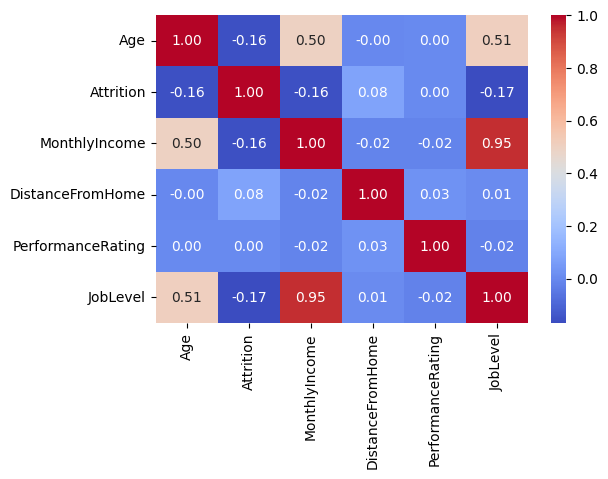

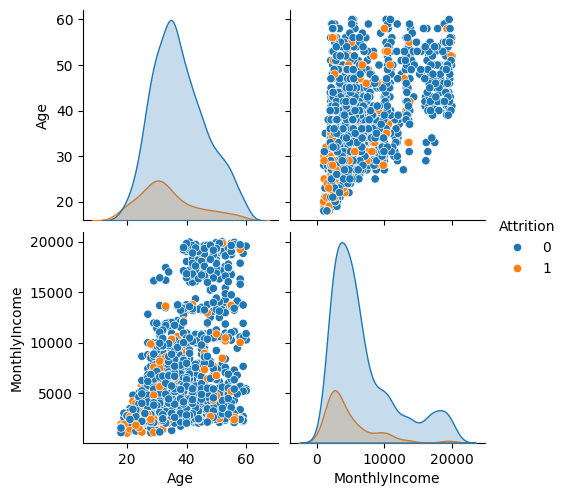

In [53]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres necesarias.

# Create a new LabelEncoder for the correlation analysis
corr_encoder = LabelEncoder()
df["Attrition"] = corr_encoder.fit_transform(df["Attrition"])

subset = df[["Age", "Attrition", "MonthlyIncome", "DistanceFromHome", "PerformanceRating","JobLevel"]]
corr_matrix = subset.corr()
print(corr_matrix)
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

sns.pairplot(df[["Age","MonthlyIncome","Attrition"]], hue="Attrition")
plt.show()


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 7:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberás aplicar a cada variable y de acuerdo a su tipo.**



In [54]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline( None )
numericas_pipeline_nombres = None

# ORDINALES:
catOrd_pipeline = Pipeline( None )
catOrd_pipeline_nombres = None

# BINARIAS:
catBin_pipeline = Pipeline( None )
catBin_pipeline_nombres = None

# NOMINALES:
catNom_pipeline = Pipeline( None )
catNom_pipeline_nombres = None



columnasTransformer = ColumnTransformer( None )



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 8:**

* #### **Reagrupamos los conjuntos de entrenamiento y validación en un solo DataFrame. A estos nuevos DataFrame los llamaremos Xtv y ytv.**

* #### **¿Cuál es la justificación de agrupar en este paso los conjuntos de entrenamiento y validación?**

++++++++ Inicia la sección de agregar texto: ++++++++++++


None


++++++++ Termina la sección de agregar texto. +++++++++++

In [55]:
Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrain, yval], axis=0)

print("Dimensión del conjunto Train+Val:")
print(Xtv.shape)
print(ytv.shape)

Dimensión del conjunto Train+Val:
(1176, 30)
(1176, 1)


# **Ejercicio 9:**

#### **Busca los mejores hiperparámetros para cada modelo.**


In [56]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(None,    # Incluye aquí todos los hiperparámetros y valores que consideres adecuados
                                      ))
  nombres.append('kNN')


  return modelos, nombres




# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Pasamos al entrenamiento de los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, tick_labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

SyntaxError: positional argument follows keyword argument (ipython-input-3009154089.py, line 10)


# **Ejercicio 10:**

* #### **Utilizando el mejor modelo encontrado en el paso anterior y los datos Xtv, ytv, realiza ahora una búsqueda de malla para tratar de mejorar el desempeño de dicho modelo.**

* #### **Verifica además que el modelo no esté subentrenado o sobreentrenado.**

* #### **Llama "grid_result" al mejor modelo ajustado.**


* **NOTA: Para esta actividad diremos que el modelo no está sobreentrenado si la diferencia entre Train y Validation es menor al 3%.**


In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = None

None   # Incluye aquí todas las líneas de código que consideres adecuadas.

grid_result = None




# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


# **Ejercicio 11:**

#### **Finalmente, usando el conjunto de prueba (Test), responder los siguientes incisos:**

#### **a) Obtener el desempeño final del mejor modelo con el reporte de métricas classification_report() de Sklearn.**

#### **b) Obtener la matriz de confusión del mejor modelo.**

#### **c) Interpreta los valores FP, FN obtenidos en  la matriz de confusión y de acuerdo al contexto del problema.**

#### **d) Incluye tus conclusiones de este mejor modelo y los pasos futuros a seguir.**

In [ ]:
# a) Reporte del desempeño con classification_report():

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


None



print(classification_report(None, None, target_names=['No','Yes']))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

In [ ]:
# b) Matriz de confusión:

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

None


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

plt.show()


*  c)
#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

None

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

* d)

#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

None

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

# **Ejercicio 12**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

None

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<